<a href="https://colab.research.google.com/github/mumorais/ENM_UnB-Analise_Modal/blob/main/_01_Fundamentos_1GdL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dado um sistema 1GdL amortecido forçado descrito por:
$$m \ddot{u}(t) + c \dot{u}(t) + k u(t) = F(t)$$
onde a massa $m = 10 kg$, o amortecimento $c = 4Nm/s$ e rigidez $k = 1kN/m$, e forçamento $F(t) =10 \delta(t)$. Lembre-se que $ \delta(t) $ é o delta de Dirac.

Determine:

OBS: A entrega pode ser redigida no presente arquivo notebook Colab (.ipynb).

1. A frequências natural $\omega_n$ e a razão de amortecimento $\xi$ do sistema 1GdL;

2.   Seja $F(t) = F_\delta = 10 \delta(t)$, obtenha a resposta temporal analítica $u_\delta(t)$;



3.   Compare a solução analítica $u_\delta (t)$ com a solução numérica $u_{\delta,h} (t)$ por integração numérica;

In [48]:
# Rotina nGdL para solução de sistema 1GdL
import numpy as np

def nGdLarb (z, t, Minv, KK, CC, tt, Ft, n):
  x = np.atleast_2d(z[0:  n]).T
  y = np.atleast_2d(z[n:2*n]).T
  
  F = np.interp(t,tt,Ft)

  # state variable
  dxdt = y        
  dydt = Minv @ (F - (CC@y + KK@x))
  dzdt = np.vstack((dxdt, dydt))

  return dzdt.flatten()


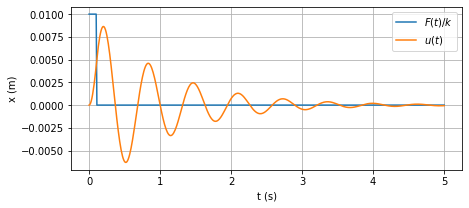

In [51]:
# packages python_scientific
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# initial data
# SP - principal system
m = 10.0                # massa         SP [kg]
k = 1000.0              # stiffness     SP [N/m]
xi = 1.00               # damping ratio SP [adim]
c = 2*xi*np.sqrt(k*m)   # damping coef. SP [N.s/m]

# dynamic matriz
MM = np.array([[m]])
KK = np.array([[k]])
CC = np.array([[c]])

F = np.array([[1]])
# initial conditions
x0 = np.array([0.0])
v0 = np.array([0.0])
z0 = np.concatenate((x0,v0))

# odeint solution
dt = 0.01                   # step size
tini, tfin = (0.0, 5.0)     # final & initial time
nt = int((tfin-tini)/dt)    # number of time steps
tt = np.linspace(tini,tfin,nt)

# loading
t1= np.array([tini, tini+10*dt, tini+11*dt , tfin])
F1= np.array([10.0, 10.0, 0.0,  0.0 ])

#
n = len(MM)
Minv = np.linalg.inv(MM)
xi = 0.10
z2 = odeint(nGdLarb, z0, tt, args=(Minv,KK,xi*CC,t1,F1,n))

# ploting
plt.figure(figsize=(7,3))
plt.plot(t1, (1/k)*F1 ,label = r'$F(t)/k$')
plt.plot(tt, z2[:,0]  ,label = r'$u(t)$')
plt.legend(loc='upper right', prop={'size':10})
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.grid()
plt.show()


4.   Obtenha a transformada de Fourier analítica $ \hat{u}_\delta (\omega) = \mathfrak{F}_{\omega} [u_\delta (t)] $; 

5.   Compare com a transformada de Fourier $\hat{u}_\delta (t)$ por FFT.